In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Importing

In [147]:
df_train=pd.read_csv(r'../input/bigmart-sales-data-2013/train_v9rqX0R.csv')
df_test=pd.read_csv(r'../input/bigmart-sales-data-2013/test_AbJTz2l.csv')
print(df_train.shape,' ',df_test.shape)

(8523, 12)   (5681, 11)


In [148]:
df_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [149]:
df_test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Data Preprocessing

In [150]:
# checking for null values

df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [151]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [152]:
# concating train and test data

concat_data=pd.concat([df_train,df_test])
print(concat_data.shape)
concat_data.head(2)

(14204, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [153]:
# again checking for null values

concat_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [154]:
# filling Item_Weight column

concat_data['Item_Weight']=concat_data['Item_Weight'].fillna(concat_data.groupby(['Item_Type'])['Item_Weight'].transform('mean'))

In [155]:
concat_data.groupby(['Outlet_Type'])['Outlet_Size'].value_counts().to_frame()

Outlet_Size
Outlet_Type       Outlet_Size             
Grocery Store     Small                880
Supermarket Type1 Small               3100
                  High                1553
                  Medium              1550
Supermarket Type2 Medium              1546
Supermarket Type3 Medium              1559

In [156]:
# filling Outlet_Size column

os=[]
for i,j in zip(concat_data.Outlet_Type.values,concat_data.Outlet_Size):
    if j is np.nan:
        if i == 'Grocery Store' or i == 'Supermarket Type1':
            os.append('Small')
        else:
            os.append('Medium')
    else:
        os.append(j)
concat_data['Outlet_Size']=os

In [157]:
# null values got filled except the Item_Outlet_Sales those to be predicted for the test data

concat_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# Encoding Categorical Data

In [158]:
cat_col=concat_data.select_dtypes(include='object').drop(['Item_Identifier','Outlet_Identifier','Outlet_Size','Item_Fat_Content','Outlet_Location_Type'],axis=1).columns
cat_col

Index(['Item_Type', 'Outlet_Type'], dtype='object')

In [159]:
# making different spellings to a unique spelling for Item_Fat_Content

fat_content=[]
for m in concat_data.Item_Fat_Content:
    if m=='Low Fat' or m =='low fat' or m=='LF':
        fat_content.append('Low Fat')
    else:
        fat_content.append('Regular')
concat_data['Item_Fat_Content']=fat_content

In [160]:
concat_data=pd.get_dummies(concat_data,columns=cat_col,prefix=cat_col,drop_first=True)
concat_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [161]:
# separating again train and test data after filling missing values

train=concat_data[:df_train.shape[0]].drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test=concat_data[df_train.shape[0]:].drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales','Outlet_Establishment_Year'],axis=1)

In [162]:
train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,3735.1380,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,443.4228,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [163]:
test.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.75,Low Fat,0.007565,107.8622,Medium,Tier 1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,8.30,Regular,0.038428,87.3198,Small,Tier 2,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='Item_Outlet_Sales'>

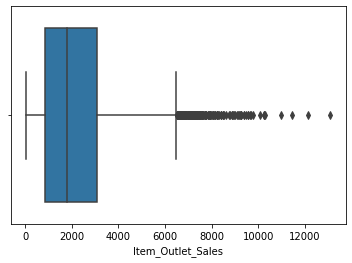

In [164]:
# checking for outliers

sns.boxplot(train.Item_Outlet_Sales)

In [165]:
def outlinefree(dataCol):     
      
    sorted(dataCol)                          # sort column
    Q1,Q3 = np.percentile(dataCol,[25,75])   # getting 25% and 75% percentile
    IQR = Q3-Q1                              # getting IQR 
    LowerRange = Q1-(1.5 * IQR)              # getting Lowrange
    UpperRange = Q3+(1.5 * IQR)              # getting Upperrange 
    
    colname = dataCol.tolist()               # convert column into list  
    newlist =[]                              # empty list for store new values
    for i in range(len(colname)):
        
        if colname[i] > UpperRange:          # list number > Upperrange 
            colname[i] = UpperRange          # then number = Upperrange
            newlist.append(colname[i])       # append value to empty list
        elif colname[i] < LowerRange:        # list number < Lowrange 
            colname[i] = LowerRange          # then number = Lowrange
            newlist.append(colname[i])       # append value to empty list 
        else:
            colname[i]                       # list number
            newlist.append(colname[i])       # append value to empty list
    return newlist

In [166]:
# treating outliers

for i in range(len(train[['Item_Outlet_Sales']].columns)):
    new_list =  outlinefree(train.loc[:,train[['Item_Outlet_Sales']].columns[i]]) # return new list
    train.loc[:,train[['Item_Outlet_Sales']].columns[i]] = new_list

<AxesSubplot:xlabel='Item_Outlet_Sales'>

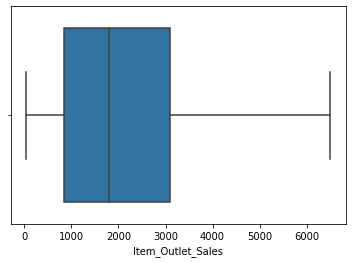

In [167]:
sns.boxplot(train.Item_Outlet_Sales)

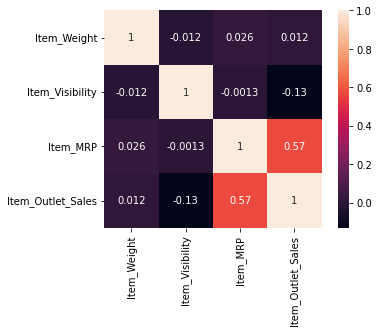

<Figure size 432x288 with 0 Axes>

In [168]:
# checking correlation

sns.heatmap(train.select_dtypes(include=['int64','float64']).corr(),square=True,annot=True)
plt.show()
plt.tight_layout()

In [169]:
# statistical summary

train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.846672,0.066132,140.992782,2156.313016,0.029450,0.012906,0.076147,0.080019,0.100434,0.144550,...,0.106770,0.049865,0.019829,0.007509,0.140795,0.052212,0.017365,0.654347,0.108882,0.109703
std,4.232806,0.051598,62.275067,1624.863069,0.169073,0.112877,0.265249,0.271338,0.300596,0.351667,...,0.308839,0.217679,0.139420,0.086334,0.347831,0.222467,0.130634,0.475609,0.311509,0.312538
min,4.555000,0.000000,31.290000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,93.826500,834.247400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.850000,0.053931,143.012800,1794.331000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.094585,185.643700,3101.296400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,6501.869900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,...,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.712492,0.065684,141.023273,0.029044,0.013378,0.076571,0.079916,0.100334,0.137476,0.026052,...,0.112304,0.054744,0.019539,0.004401,0.138884,0.049463,0.021299,0.654286,0.108784,0.109840
std,4.252177,0.051252,61.809091,0.167945,0.114897,0.265933,0.271186,0.300472,0.344379,0.159303,...,0.315768,0.227500,0.138421,0.066197,0.345856,0.216852,0.144392,0.475642,0.311395,0.312718
min,4.555000,0.000000,31.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.195000,0.027047,94.412000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.766104,0.054154,141.415400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,15.850000,0.093463,186.026600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.323637,266.588400,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
x=train.drop(['Item_Outlet_Sales','Item_Visibility','Item_Weight','Item_Fat_Content','Outlet_Size','Outlet_Location_Type'],axis=1)
y=train[['Item_Outlet_Sales']]
test_data=test.drop(['Item_Visibility','Item_Weight','Item_Fat_Content','Outlet_Size','Outlet_Location_Type'],axis=1)
print(x.shape,' ',y.shape,' ',test_data.shape)

(8523, 19)   (8523, 1)   (5681, 19)


# Data Modeling

In [172]:
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [173]:
# Linear Regression

lr=LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(lr,x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores,'\n',np.mean(scores))

[-1011.00563118 -1055.54583842 -1066.1953019  -1068.24497601
 -1104.78861691] 
 -1061.1560728850545


In [174]:
# ElasticNet

en=ElasticNet(alpha=0.001, normalize=True)
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(en,x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores,'\n',np.mean(scores))

[-1428.58236136 -1459.53332758 -1484.76194876 -1464.4953823
 -1515.26303816] 
 -1470.5272116306494


In [175]:
# Random Forest

rf=RandomForestRegressor()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(rf,x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores,'\n',np.mean(scores))

[-1117.50262269 -1139.15463129 -1149.86449373 -1145.46174894
 -1188.79288957] 
 -1148.1552772432628


In [176]:
# Gradient Boosting

gb= GradientBoostingRegressor()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(gb,x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores,'\n',np.mean(scores))

[ -975.30413616 -1015.5837667  -1033.79194965 -1029.94882739
 -1064.09349977] 
 -1023.7444359350717


In [177]:
# xgboost

xgb= XGBRegressor()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(xgb,x, y, scoring='neg_root_mean_squared_error', cv=folds)
print(scores,'\n',np.mean(scores))

[-1054.27619356 -1077.24484582 -1095.08270166 -1087.35873612
 -1109.80405097] 
 -1084.7533056261245


So, Gradient Boosting Model is giving the best rmse.

# Final Submission

Here, Gradient Boosting Model is performing well both for train and test data

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [179]:
# parameter tuning

param_grid={'n_estimators':[400,750,1000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4,6],'subsample':[.5,.75,1]}
tuning=GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                    param_grid=param_grid,scoring='r2',verbose=2,cv=None)
# tuning.fit(x_train,y_train)
# tuning.best_params_
# {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 400, 'subsample': 1}

In [180]:
# Gradient Boosting Model for final prediction

gb_model=GradientBoostingRegressor(random_state=42,learning_rate=0.01,max_depth=4,n_estimators=400,subsample=1)
gb_model.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=400,
                          random_state=42, subsample=1)

In [181]:
metrics.r2_score(y_test,gb_model.predict(x_test)) ## accuracy check

0.6200229194969975

In [182]:
final_predict=gb_model.predict(test_data) ## prediction for test data

In [183]:
sub=pd.DataFrame({'Item_Identifier':df_test.Item_Identifier.values,'Outlet_Identifier':df_test.Outlet_Identifier.values,'Item_Outlet_Sales':final_predict.flatten()})
sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1676.133438
1,FDW14,OUT017,1382.395487
2,NCN55,OUT010,870.854181
3,FDQ58,OUT017,2428.854769
4,FDY38,OUT027,5293.319539
...,...,...,...
5676,FDB58,OUT046,2146.489228
5677,FDD47,OUT018,2588.074511
5678,NCO17,OUT045,1952.365392
5679,FDJ26,OUT017,3366.147028


In [184]:
# sub.to_csv('Submission.csv',index=False)